<a href="https://colab.research.google.com/github/abdulwasaeee/Pytorch-Bootcamp/blob/main/pytorch_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn
from torchmetrics import Accuracy
from sklearn.metrics import classification_report

In [57]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 46.5 MB/s eta 0:00:00


In [24]:
x,y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.5, random_state=42)

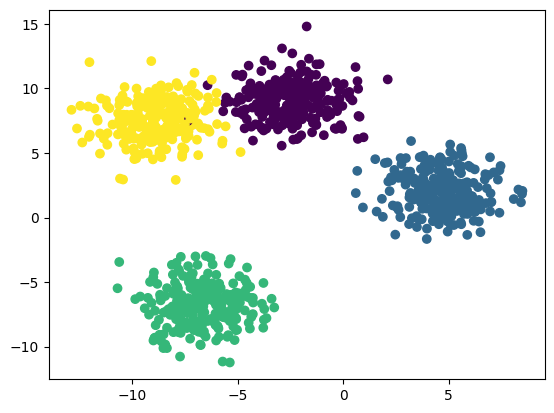

In [25]:
plt.scatter(x[:,0],x[:,1],c=y)

In [26]:
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [27]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y , test_size=0.25, random_state=42)

In [28]:
class BCM(nn.Module):
  def __init__(self,ipfts,opfts,hus=8):
    super().__init__()
    self.modellayers=nn.Sequential(
        nn.Linear(in_features=ipfts,out_features=hus),
        nn.ReLU(),
        nn.Linear(in_features=hus,out_features=hus),
        nn.ReLU(),
        nn.Linear(in_features=hus,out_features=opfts),

    )

  def forward(self,x):
    return self.modellayers(x)


In [29]:
torch.unique(y)

tensor([0., 1., 2., 3.])

In [30]:
model= BCM(ipfts=2,opfts=4)

In [31]:
model.state_dict()

OrderedDict([('modellayers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('modellayers.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('modellayers.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.2767, -0.2512,  0.0223, 

In [32]:
lossfn=nn.CrossEntropyLoss()
opt=torch.optim.Adam(params=model.parameters(),lr=0.01)

In [33]:
def accuracy(ypred,ytrue):
  correct=torch.eq(ytrue, ypred).sum().item()
  acc= (correct/len(ypred)) * 100
  return acc

In [34]:
e=[]
l=[]
a=[]

In [63]:
torch.manual_seed(42)
epochs=100

for i in range(epochs):
  model.train()
  ylogits=model(xtrain)
  ypred=torch.softmax(ylogits,dim=1).argmax(dim=1)
  loss=lossfn(ylogits,ytrain.type(torch.LongTensor))
  acc=accuracy(ypred,ytrain.type(torch.LongTensor)) # Convert ytrain to LongTensor

  opt.zero_grad()
  loss.backward()
  opt.step()

  model.eval()
  with torch.inference_mode():
    testylogits=model(xtest)
    testypred=torch.softmax(testylogits,dim=1).argmax(dim=1)
    loss=lossfn(testylogits, ytest.type(torch.LongTensor))
    acc=accuracy(testypred,ytest.type(torch.LongTensor)) # Convert ytest to LongTensor
  if i % 10 == 0:
    e.append(i)
    l.append(loss)
    a.append(acc)
    print(f"epoch : {i} | loss: {loss} |  accuracy:  {acc} ")

epoch : 0 | loss: 0.012321464717388153 |  accuracy:  99.6 
epoch : 10 | loss: 0.011872397735714912 |  accuracy:  99.6 
epoch : 20 | loss: 0.011481985449790955 |  accuracy:  99.6 
epoch : 30 | loss: 0.011172800324857235 |  accuracy:  99.6 
epoch : 40 | loss: 0.010869806632399559 |  accuracy:  99.6 
epoch : 50 | loss: 0.01060411799699068 |  accuracy:  99.6 
epoch : 60 | loss: 0.010360822081565857 |  accuracy:  99.6 
epoch : 70 | loss: 0.010129649192094803 |  accuracy:  99.6 
epoch : 80 | loss: 0.009915314614772797 |  accuracy:  99.6 
epoch : 90 | loss: 0.009713450446724892 |  accuracy:  99.6 


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_decision_boundary(model, x, y, num_classes):
    # Convert to numpy
    x = x.detach().cpu().numpy()
    y = y.detach().cpu().numpy()

    # Define grid
    x_min, x_max = x[:,0].min() - 0.5, x[:,0].max() + 0.5
    y_min, y_max = x[:,1].min() - 0.5, x[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Predict on grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.FloatTensor(grid)
    with torch.no_grad():
        logits = model(grid_tensor)
        preds = torch.argmax(logits, dim=1)   # take class with highest score
    preds = preds.numpy().reshape(xx.shape)

    # Plot decision regions
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.get_cmap("tab10", num_classes))

    # Plot training points
    plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.get_cmap("tab10", num_classes), edgecolors="k")
    plt.show()


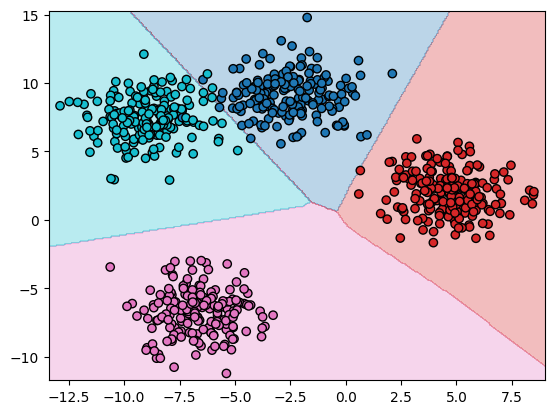

In [55]:
import warnings
warnings.filterwarnings('ignore')
plot_decision_boundary(model, xtrain, ytrain,num_classes=4)

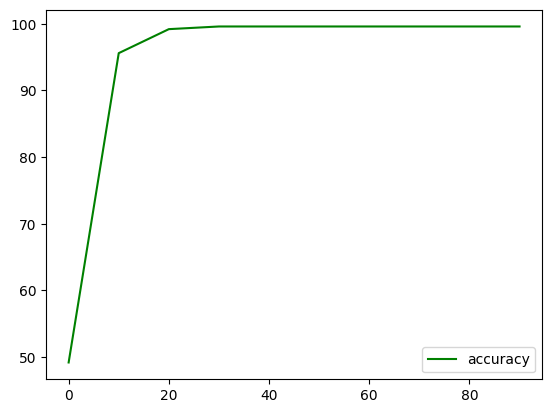

In [43]:
plt.plot(e,a,label='accuracy',c='g')
plt.legend()

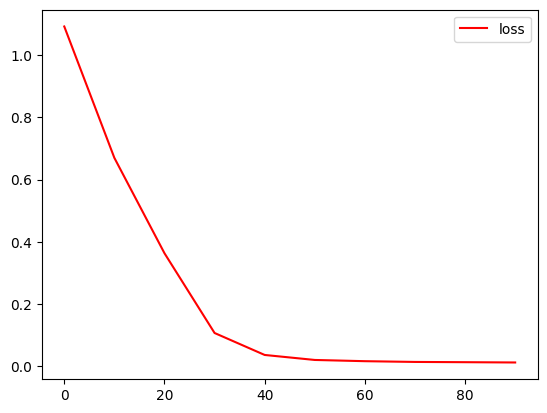

In [41]:
plt.plot(e,l,label='loss',c='r')
plt.legend()

In [44]:
ytest

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1., 1., 0., 2., 2., 0., 0., 0., 1., 3., 0., 0., 0., 3., 2., 3., 2.,
        1., 1., 3., 2., 2., 2., 3., 1., 

In [46]:
torch.softmax(model(xtest),dim=1).argmax(dim=1)

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2,
        1, 1, 3, 2, 2, 2, 3, 1, 3, 2, 3, 0, 1, 0, 0, 1, 1, 3, 0, 2, 2, 1, 1, 3,
        1, 1, 2, 3, 3, 0, 0, 0, 1, 0])

In [74]:
accu=Accuracy(task="multiclass",num_classes=4)
accu(testypred,ytest)

tensor(0.9960)

In [76]:
print(classification_report(ytest,testypred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        64
         1.0       1.00      1.00      1.00        54
         2.0       1.00      1.00      1.00        64
         3.0       1.00      0.99      0.99        68

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

